# Klusterointi: tehtävät

Näissä tehtävissä täydennettävät osat on merkitty alaviivoilla _ . Tehtävänäsi on siis niiden paikalle keksiä oikea funktiokutsu, ja mahdollisesti tarvittavat parametrit.

Ilmoitetaan tässä tehtävässä tarvittavat kirjastot:

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns

Lataa iris-dataset dataframeen totuttuun tapaan:

In [2]:
df=pd.read_csv('../Iris.csv')

Tutkitaan iris-dataa. Tulosta kymmenen ensimmäistä riviä ja mieti, mikä eri sarakkeiden merkitys on ja mitä dataa meillä on.

In [3]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


Poistetaan Id kolumni, koska emme tee sillä mitään:

In [4]:
df=df.drop('Id', axis=1)

Tutki, kuinka monta riviä datasetissä on.

In [5]:
df.shape

(150, 5)

Tutki seuraavaksi numeeristen muuttujien jakaumia:

In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Ovatko tämän perusteella muuttujien keskiarvo ja mediaani lähellä toisiaan? Jos eivät, mistä se kertoo?

Jos aiemmasta taulukosta ei käy ilmi, löytyykö puuttuvia arvoja, tarkasta se tässä:

In [7]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Listaa kaikki mahdolliset species-sarakkeen arvot:

In [9]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Species kertoo meille, mihin lajiin kyseinen kurjenmiekka kuuluu. Siitä saamme "oikeat vastaukset". Emme halua kuitenkaan käyttää sitä klusteroinnissa, koska tavoitteena olisi tunnistaa ne ryhmät muiden tietojen perusteella. Muutetaan se kuitenkin valmiiksi numeeriseen muotoon kertomalla ensin että se on kategoria ja sen jälkeen hakemalla vastaavat numeeriset koodit:

In [10]:
df['Species']=df['Species'].astype('category').cat.codes

Vaikka tiedämme, että ryhmiä on 3, tutkitaan silti, miten eri klustereiden määrä vaikuttaa varianssiin. Muista tehdä klusterointi vain 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' -muuttujilla!

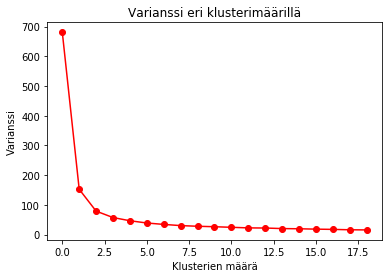

In [11]:
variances = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, max_iter=200) 
    kmeans.fit_predict(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
    variances.append(kmeans.inertia_)
    
plt.plot(variances, 'ro-', label="Variance")
plt.title("Varianssi eri klusterimäärillä")
plt.xlabel("Klusterien määrä")
plt.ylabel("Varianssi")
plt.show()

Tehdään sitten klusterointi oikealla k:n arvolla, eli 3:lla klusterilla.

In [12]:
kmeans = KMeans(n_clusters=3, max_iter=200)
clusters=kmeans.fit_predict(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

Lisää klusteritiedot alkuperäiseen datasettiin cluster-nimiseen attribuuttiin ja varmista, että attribuutti on lisätty:

In [13]:
df['clusters']=clusters
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


Visualisoi klusteroinnin tulos haluamallasi tavalla:

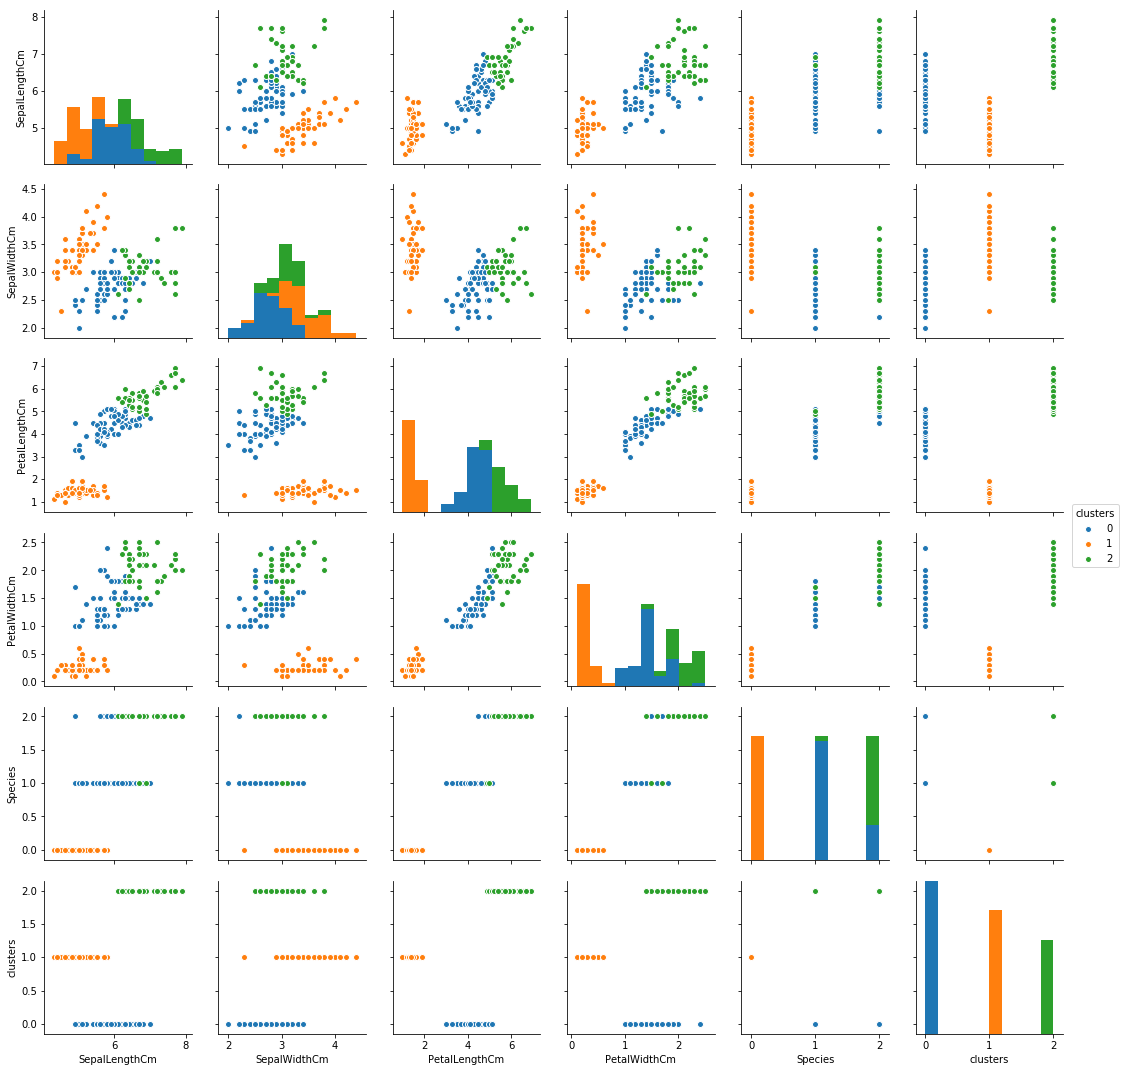

In [16]:
sns.pairplot(df, hue='clusters')

Miten tulkitsisit kuvaajia? Kokeile, saisitko K-Meansin parametreja muokkaamalla erilaisia tuloksia.